# 8.3.3 Bagging and Random Forests

In [1]:
library(tree)
library(ISLR2)
attach(Carseats)
High <- factor(ifelse(Sales <= 8, "No", "Yes"))

In [2]:
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
boston.test <- Boston[-train, "medv"]

Here we apply bagging and random forests to the `Boston` data, using the `randomForest` package in `R`. The exact results obtained in this section may depend on the version of `R` and the version of the `randomForest` package installed on your computer. Recall that bagging is simply a special case of a random forest with $m=p$. Therefore, the `randomForest()` function can be used to perform both random forests and bagging. We perform bagging as follows:

In [3]:
library(randomForest)
set.seed(1)
bag.boston <- randomForest(medv ~ ., data = Boston, subset = train, mtry = 12, importance = TRUE)
bag.boston

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 12, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 12

          Mean of squared residuals: 11.40162
                    % Var explained: 85.17

The argument `mtry = 12` indicates that all 12 predictors should be considered for each split of the tree&mdash;in other words, that bagging should be done. How well does this bagged model perform on the test set?

[1] 23.41916

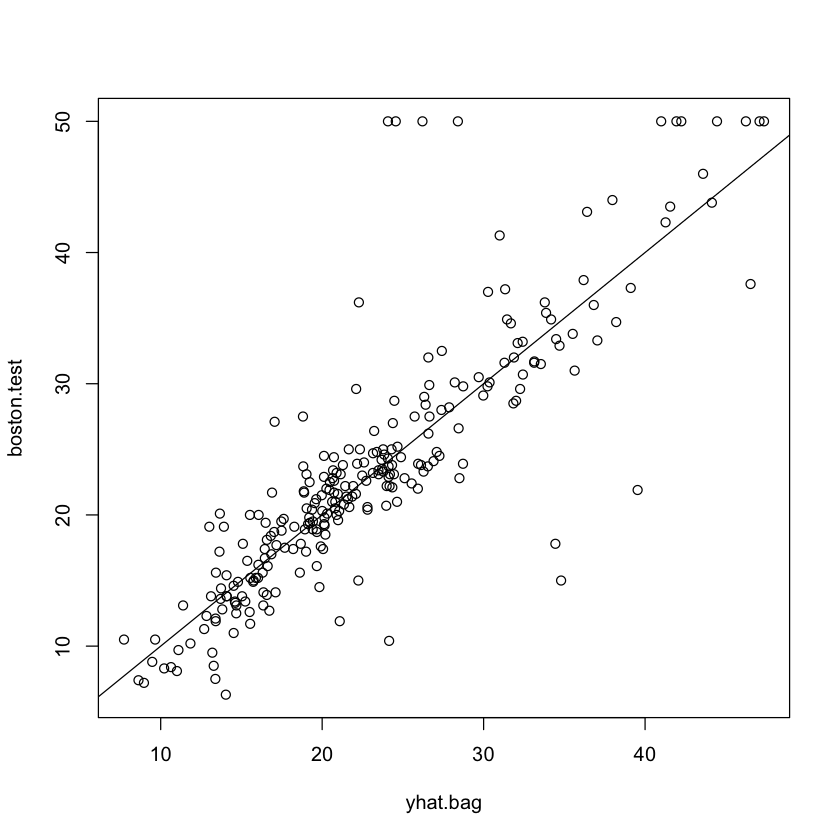

In [4]:
yhat.bag <- predict(bag.boston, newdata = Boston[-train,])
plot(yhat.bag, boston.test)
abline(0, 1)
mean((yhat.bag - boston.test)^2)

The test set MSE associated with the bagged regression tree is $23.42$, about two-thrids of that obtained using an optimally-pruned single tree. We could change the number of trees grwon by `randomForest()` using the `ntree` argument:

In [5]:
bag.boston <- randomForest(medv ~ ., data = Boston, subset = train, mtry = 12, ntree = 25)
yhat.bag <- predict(bag.boston, newdata = Boston[-train,])
mean((yhat.bag - boston.test)^2)

[1] 25.75055

Growing a random forest proceeds in exactly the same way, except that we use a smaller value of the `mtry` argument. By default, `randomForest()` uses $p/3$ variables when building a random forest of regression trees, and $\sqrt(p)$ variables when building a random forest of classification trees. Here we use `mtry = 6`.

In [6]:
set.seed(1)
rf.boston <- randomForest(medv ~ ., data = Boston, subset = train, mtry = 6, importance = TRUE)
yhat.rf <- predict(rf.boston, newdata = Boston[-train,])
mean((yhat.rf - boston.test)^2)

[1] 20.06644

The test set MSE is $20.07$; this indicates that random forests yielded an improvement over bagging in this case.

Using the `importance()` function, we can view the importance of each variable.

In [7]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,19.435587,1070.42307
zn,3.091630,82.19257
indus,6.140529,590.09536
chas,1.370310,36.70356
nox,13.263466,859.97091
rm,35.094741,8270.33906
age,15.144821,634.31220
dis,9.163776,684.87953
rad,4.793720,83.18719
tax,4.410714,292.20949


Two measures of variable importance are reported. The first is based upon the mean decrease of accuracy in predictions on the out of bag samples when a given variable is permuted. The second is a measure of the total decrease in node impurity that results from splits over that variable, averaged over all trees (this was plotted in Figure 8.9). In the case of regression trees, the node impurity is measured by the training RSS, and for classification trees by the deviance. Plots of these importance measures can be produced using the `varImpPlot()` function.

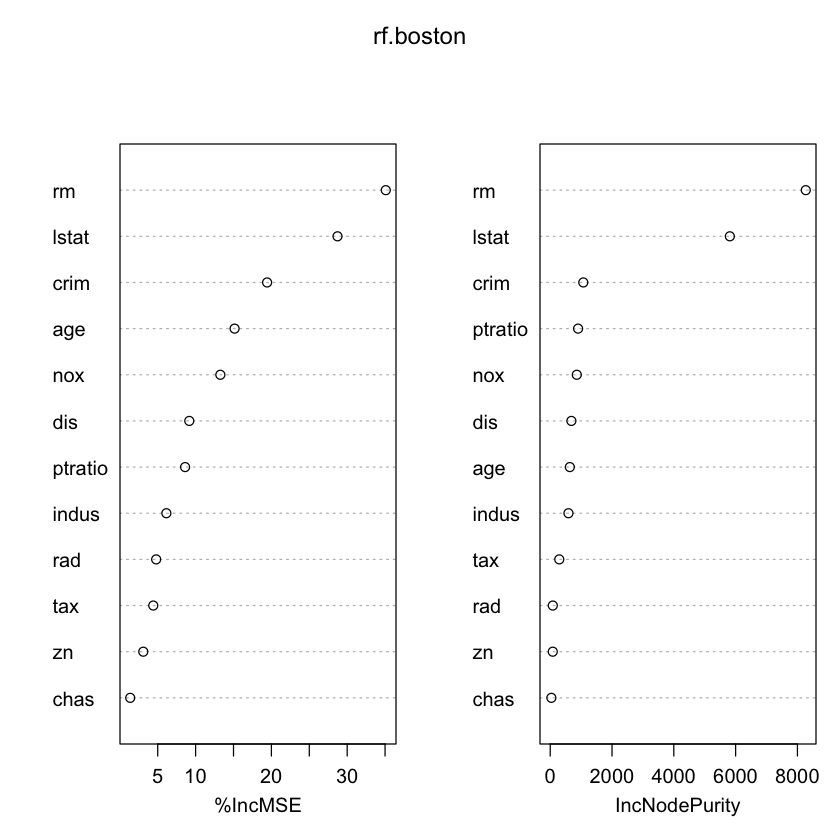

In [8]:
varImpPlot(rf.boston)

The results indicate that across all of the trees considered in the random forest, the wealth of the community (`lstat`) and the house sie (`rm`) are by far the two most important variables.